# Credit Cart


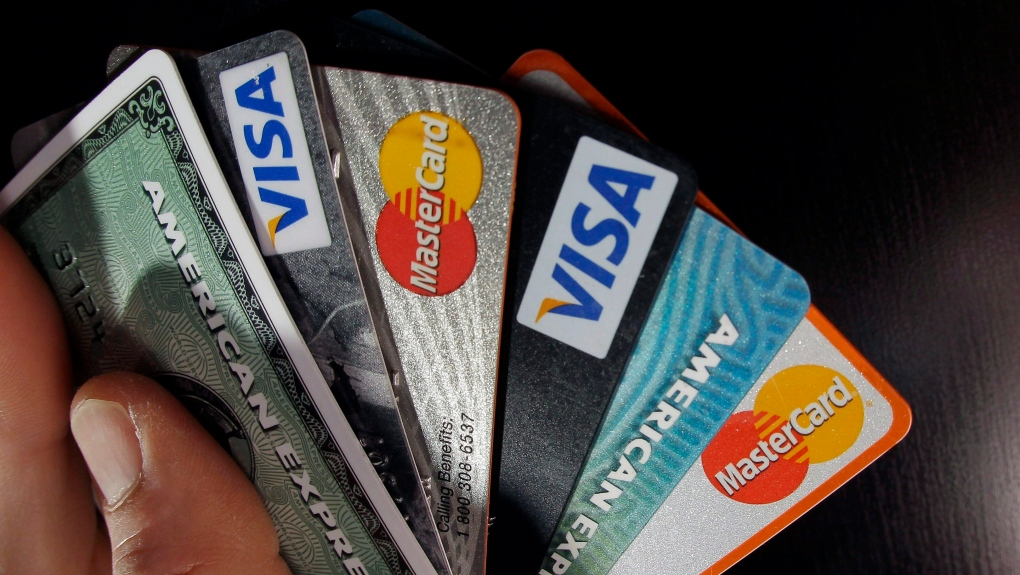

In [8]:
from IPython.display import Image
Image(filename="img/image.jpg", width=400,height=200)


In [ ]:
import numpy as np
import pandas as pd

np.random.seed(123)

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
import seaborn as sns
sns.set_style("whitegrid")

# Data Exploration

In [267]:
# Data exploration

data_o=pd.read_excel("default of credit card clients.xls",header=1,inplace=True)
data_o

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0          1      20000    2          2         1   24      2      2     -1   
1          2     120000    2          2         2   26     -1      2      0   
2          3      90000    2          2         2   34      0      0      0   
3          4      50000    2          2         1   37      0      0      0   
4          5      50000    1          2         1   57     -1      0     -1   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
29995  29996     220000    1          3         1   39      0      0      0   
29996  29997     150000    1          3         2   43     -1     -1     -1   
29997  29998      30000    1          2         2   37      4      3      2   
29998  29999      80000    1          3         1   41      1     -1      0   
29999  30000      50000    1          2         1   46      0      0      0   

       PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
0         -1  ...          0          0          0         0       689   
1          0  ...       3272       3455       3261         0      1000   
2          0  ...      14331      14948      15549      1518      1500   
3          0  ...      28314      28959      29547      2000      2019   
4          0  ...      20940      19146      19131      2000     36681   
...      ...  ...        ...        ...        ...       ...       ...   
29995      0  ...      88004      31237      15980      8500     20000   
29996     -1  ...       8979       5190          0      1837      3526   
29997     -1  ...      20878      20582      19357         0         0   
29998      0  ...      52774      11855      48944     85900      3409   
29999      0  ...      36535      32428      15313      2078      1800   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0             0         0         0         0                           1  
1          1000      1000         0      2000                           1  
2          1000      1000      1000      5000                           0  
3          1200      1100      1069      1000                           0  
4         10000      9000       689       679                           0  
...         ...       ...       ...       ...                         ...  
29995      5003      3047      5000      1000                           0  
29996      8998       129         0         0                           0  
29997     22000      4200      2000      3100                           1  
29998      1178      1926     52964      1804                           1  
29999      1430      1000      1000      1000                           1  

[30000 rows x 25 columns]

In [268]:
data=data_o.copy()
data.info()
# There is no null value.
# We creat a copy of original data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [269]:
print(((sum(data["default payment next month"]==0))/30000)*100)
print(((sum(data["default payment next month"]==1))/30000)*100)
#As we have 30000 entries in dataset, the data does not seem to be imbalanced .

77.88000000000001
22.12


In [270]:
# ID column does not include any usefull information so we can drop it.
data.drop(["ID"],axis=1,inplace=True)
data

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0          20000    2          2         1   24      2      2     -1     -1   
1         120000    2          2         2   26     -1      2      0      0   
2          90000    2          2         2   34      0      0      0      0   
3          50000    2          2         1   37      0      0      0      0   
4          50000    1          2         1   57     -1      0     -1      0   
...          ...  ...        ...       ...  ...    ...    ...    ...    ...   
29995     220000    1          3         1   39      0      0      0      0   
29996     150000    1          3         2   43     -1     -1     -1     -1   
29997      30000    1          2         2   37      4      3      2     -1   
29998      80000    1          3         1   41      1     -1      0      0   
29999      50000    1          2         1   46      0      0      0      0   

       PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
0         -2  ...          0          0          0         0       689   
1          0  ...       3272       3455       3261         0      1000   
2          0  ...      14331      14948      15549      1518      1500   
3          0  ...      28314      28959      29547      2000      2019   
4          0  ...      20940      19146      19131      2000     36681   
...      ...  ...        ...        ...        ...       ...       ...   
29995      0  ...      88004      31237      15980      8500     20000   
29996      0  ...       8979       5190          0      1837      3526   
29997      0  ...      20878      20582      19357         0         0   
29998      0  ...      52774      11855      48944     85900      3409   
29999      0  ...      36535      32428      15313      2078      1800   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0             0         0         0         0                           1  
1          1000      1000         0      2000                           1  
2          1000      1000      1000      5000                           0  
3          1200      1100      1069      1000                           0  
4         10000      9000       689       679                           0  
...         ...       ...       ...       ...                         ...  
29995      5003      3047      5000      1000                           0  
29996      8998       129         0         0                           0  
29997     22000      4200      2000      3100                           1  
29998      1178      1926     52964      1804                           1  
29999      1430      1000      1000      1000                           1  

[30000 rows x 24 columns]

In [5]:
data.describe()
# st in "LIMIT_BAL" is high. The mean and 50% values in most cases have big cap that all, can show we have alot of outliers.

LIMIT_BAL           SEX     EDUCATION      MARRIAGE           AGE  \
count    30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean    167484.322667      1.603733      1.853133      1.551867     35.485500   
std     129747.661567      0.489129      0.790349      0.521970      9.217904   
min      10000.000000      1.000000      0.000000      0.000000     21.000000   
25%      50000.000000      1.000000      1.000000      1.000000     28.000000   
50%     140000.000000      2.000000      2.000000      2.000000     34.000000   
75%     240000.000000      2.000000      2.000000      2.000000     41.000000   
max    1000000.000000      2.000000      6.000000      3.000000     79.000000   

              PAY_0         PAY_2         PAY_3         PAY_4         PAY_5  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      -0.016700     -0.133767     -0.166200     -0.220667     -0.266200   
std        1.123802      1.197186      1.196868      1.169139      1.133187   
min       -2.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%       -1.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        8.000000      8.000000      8.000000      8.000000      8.000000   

       ...      BILL_AMT4      BILL_AMT5      BILL_AMT6       PAY_AMT1  \
count  ...   30000.000000   30000.000000   30000.000000   30000.000000   
mean   ...   43262.948967   40311.400967   38871.760400    5663.580500   
std    ...   64332.856134   60797.155770   59554.107537   16563.280354   
min    ... -170000.000000  -81334.000000 -339603.000000       0.000000   
25%    ...    2326.750000    1763.000000    1256.000000    1000.000000   
50%    ...   19052.000000   18104.500000   17071.000000    2100.000000   
75%    ...   54506.000000   50190.500000   49198.250000    5006.000000   
max    ...  891586.000000  927171.000000  961664.000000  873552.000000   

           PAY_AMT2      PAY_AMT3       PAY_AMT4       PAY_AMT5  \
count  3.000000e+04   30000.00000   30000.000000   30000.000000   
mean   5.921163e+03    5225.68150    4826.076867    4799.387633   
std    2.304087e+04   17606.96147   15666.159744   15278.305679   
min    0.000000e+00       0.00000       0.000000       0.000000   
25%    8.330000e+02     390.00000     296.000000     252.500000   
50%    2.009000e+03    1800.00000    1500.000000    1500.000000   
75%    5.000000e+03    4505.00000    4013.250000    4031.500000   
max    1.684259e+06  896040.00000  621000.000000  426529.000000   

            PAY_AMT6  default payment next month  
count   30000.000000                30000.000000  
mean     5215.502567                    0.221200  
std     17777.465775                    0.415062  
min         0.000000                    0.000000  
25%       117.750000                    0.000000  
50%      1500.000000                    0.000000  
75%      4000.000000                    0.000000  
max    528666.000000                    1.000000  

[8 rows x 24 columns]

In [271]:
data.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [272]:
data.shape

(30000, 24)

In [273]:
# dividing features to categorical and numerical variable
var_cat=["SEX","EDUCATION","MARRIAGE","PAY_0","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6"]
var_num=["LIMIT_BAL",'BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',"AGE"]
var_ind= ['default payment next month']

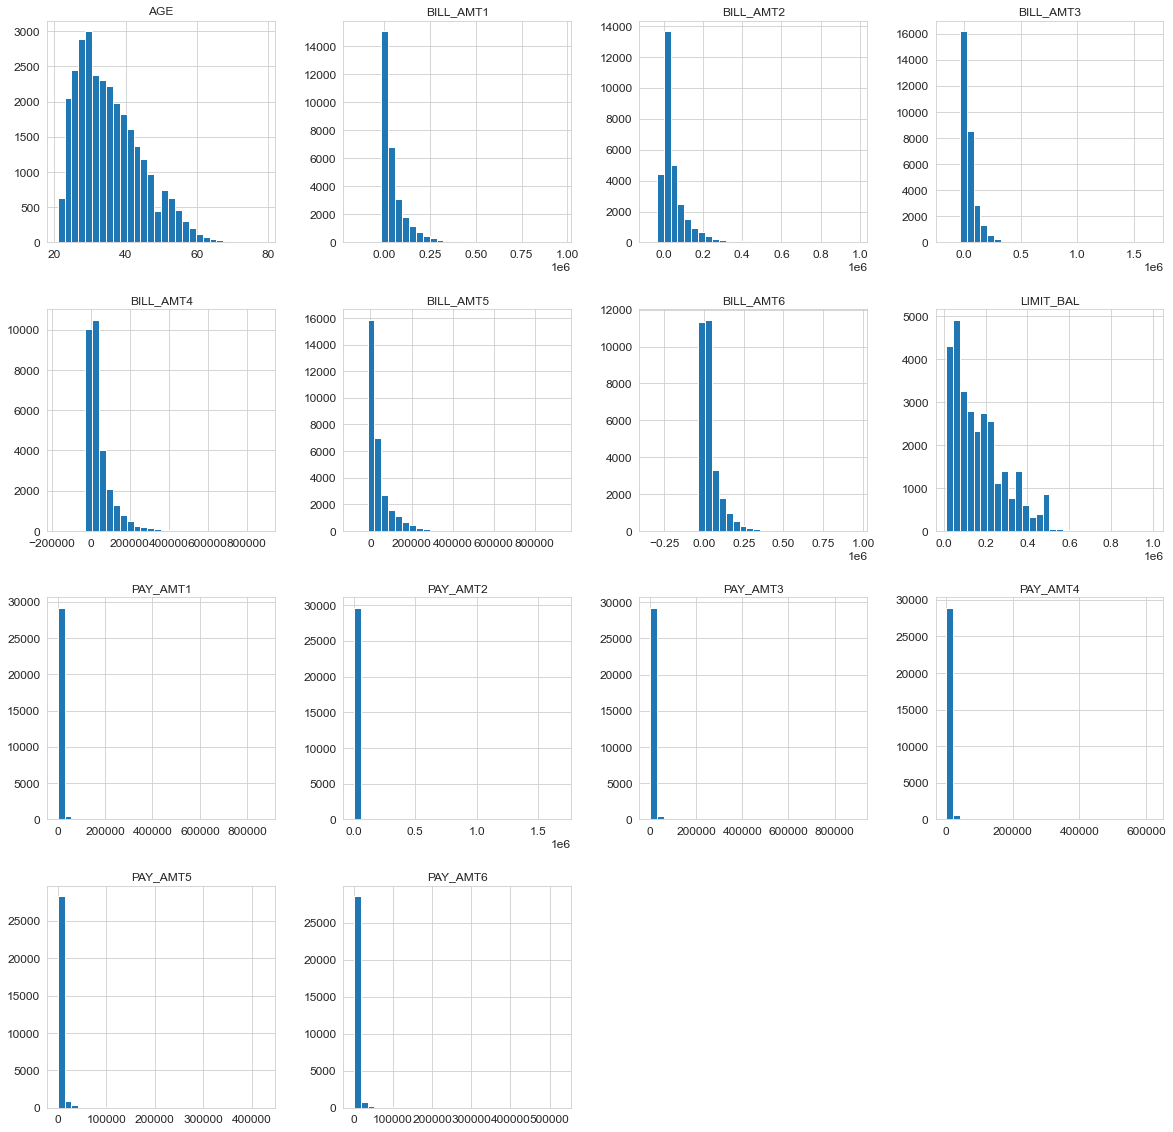

In [274]:
data.loc[:,var_num].hist(bins=30,figsize=(20,20))
plt.show()
# The distributions of numerical features show most of them are not normally distributed. So we need normalize them.

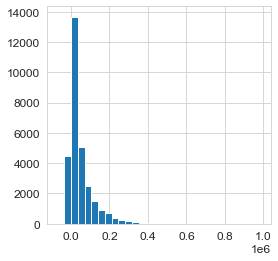

In [10]:
# before 
data.loc[:,"BILL_AMT2"].hist(bins=30,figsize=(4,4))
plt.show()     



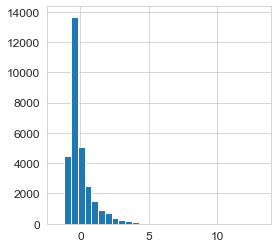

In [275]:
#after
# For normalization I  tried to scale up values,but the result plot does not show any change. 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
tfmr = StandardScaler()
data["BILL_AMT2_scal"]=tfmr.fit_transform(data[['BILL_AMT2']])
data["BILL_AMT2_scal"].hist(bins=30,figsize=(4,4))                         
plt.show()


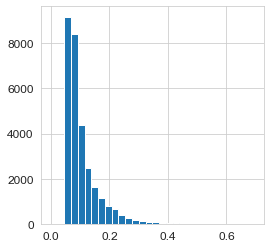

In [276]:
#after
#I tried to scale up by other function and after that get log to normalize but again nothing happened!
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
tfmr =  MinMaxScaler()
data["BILL_AMT2_min"]=tfmr.fit_transform(data[['BILL_AMT2']])
data["BILL_AMT2_min"].apply(np.log1p).dropna().hist(bins=30,figsize=(4,4))                         
plt.show()


In [277]:
#In var_num distribution,there is right skewed ,the ways to normalize this kind of data are: log,square root and cube root we do log method
data["AGE_log"]=data["AGE"].apply(np.log)
data["LIMIT_BAL_log"]=data["LIMIT_BAL"].apply(np.log)
data["BILL_AMT1_log"]=data["BILL_AMT1"].apply(np.log)
data["BILL_AMT2_log"]=data["BILL_AMT2"].apply(np.log)
data["BILL_AMT3_log"]=data["BILL_AMT3"].apply(np.log1p).dropna()
data["BILL_AMT4_log"]=data["BILL_AMT4"].apply(np.log1p)
data["BILL_AMT5_log"]=data["BILL_AMT5"].apply(np.log1p)
data["BILL_AMT6_log"]=data["BILL_AMT6"].apply(np.log)
data["PAY_AMT1_log"]=data["PAY_AMT1"].apply(np.log)
data["PAY_AMT2_log"]=data["PAY_AMT2"].apply(np.log)
data["PAY_AMT3_log"]=data["PAY_AMT3"].apply(np.log)
data["PAY_AMT4_log"]=data["PAY_AMT4"].apply(np.log)
data["PAY_AMT5_log"]=data["PAY_AMT5"].apply(np.log)
data["PAY_AMT6_log"]=data["PAY_AMT6"].apply(np.log)

# I tried to plot logs ,but there are infinit values that avoid plotting.I tried to remove infinit values and get plot to see if there are more normalized.

In [278]:
np.isinf(data["AGE_log"]).values.sum()

0

In [279]:
np.isinf(data["LIMIT_BAL_log"]).values.sum()


0

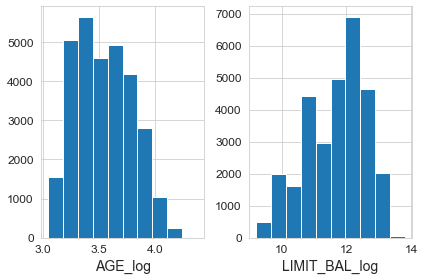

In [280]:
# as in log values for "AGE_log"&"LIMIT_BAL_log"the infinit values are zero I normalize this two feature by log method.The plot shows more likely normalized.
plt.subplot(1,2,1)
plt.hist(data.loc[:,"AGE_log"],bins=10)


plt.xlabel('AGE_log')

plt.subplot(1,2,2)
plt.hist(data.loc[:,"LIMIT_BAL_log"],bins=10)
plt.xlabel('LIMIT_BAL_log')


plt.tight_layout()
plt.show()

In [281]:
print(np.isinf(data["BILL_AMT1_log"]).values.sum())
print(np.isinf(data["BILL_AMT2_log"]).values.sum())
print(np.isinf(data["BILL_AMT3_log"]).values.sum())
print(np.isinf(data["BILL_AMT4_log"]).values.sum())
print(np.isinf(data["BILL_AMT5_log"]).values.sum())
print(np.isinf(data["BILL_AMT6_log"]).values.sum())
print(np.isinf(data["PAY_AMT1_log"]).values.sum())
print(np.isinf(data["PAY_AMT2_log"]).values.sum())
print(np.isinf(data["PAY_AMT3_log"]).values.sum())
print(np.isinf(data["PAY_AMT4_log"]).values.sum())
print(np.isinf(data["PAY_AMT5_log"]).values.sum())
print(np.isinf(data["PAY_AMT6_log"]).values.sum())


2008
2506
24
25
24
4020
5249
5396
5968
6408
6703
7173


In [282]:
# As number of infinit values in "BILL_AMT3_log","BILL_AMT4_log","BILL_AMT5_log" are low(24,15,24) ,I dropped these rows and normalize by log method. The resuly plot sound more normalized.
# The infinit values in other features are very high and by dropping them I will miss a large part of data so I did not normalize them by log method.
data["BILL_AMT3_log"].replace([np.inf, -np.inf], np.nan, inplace=True)
data.dropna(inplace=True)
print(np.isinf(data["BILL_AMT3_log"]).values.sum())

data["BILL_AMT4_log"].replace([np.inf, -np.inf], np.nan, inplace=True)
data.dropna(inplace=True)
print(np.isinf(data["BILL_AMT4_log"]).values.sum())

data["BILL_AMT5_log"].replace([np.inf, -np.inf], np.nan, inplace=True)
data.dropna(inplace=True)
print(np.isinf(data["BILL_AMT5_log"]).values.sum())

0
0
0


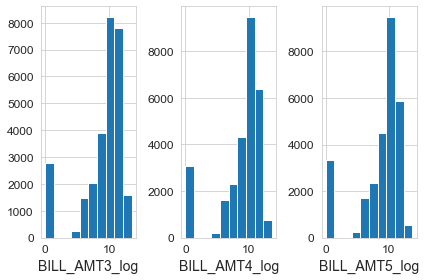

In [283]:
plt.subplot(1,3,1)
plt.hist(data.loc[:,"BILL_AMT3_log"],bins=10)
plt.xlabel('BILL_AMT3_log')

plt.subplot(1,3,2)
plt.hist(data.loc[:,"BILL_AMT4_log"],bins=10)
plt.xlabel('BILL_AMT4_log')


plt.subplot(1,3,3)
plt.hist(data.loc[:,"BILL_AMT5_log"],bins=10)
plt.xlabel('BILL_AMT5_log')

plt.tight_layout()
plt.show()

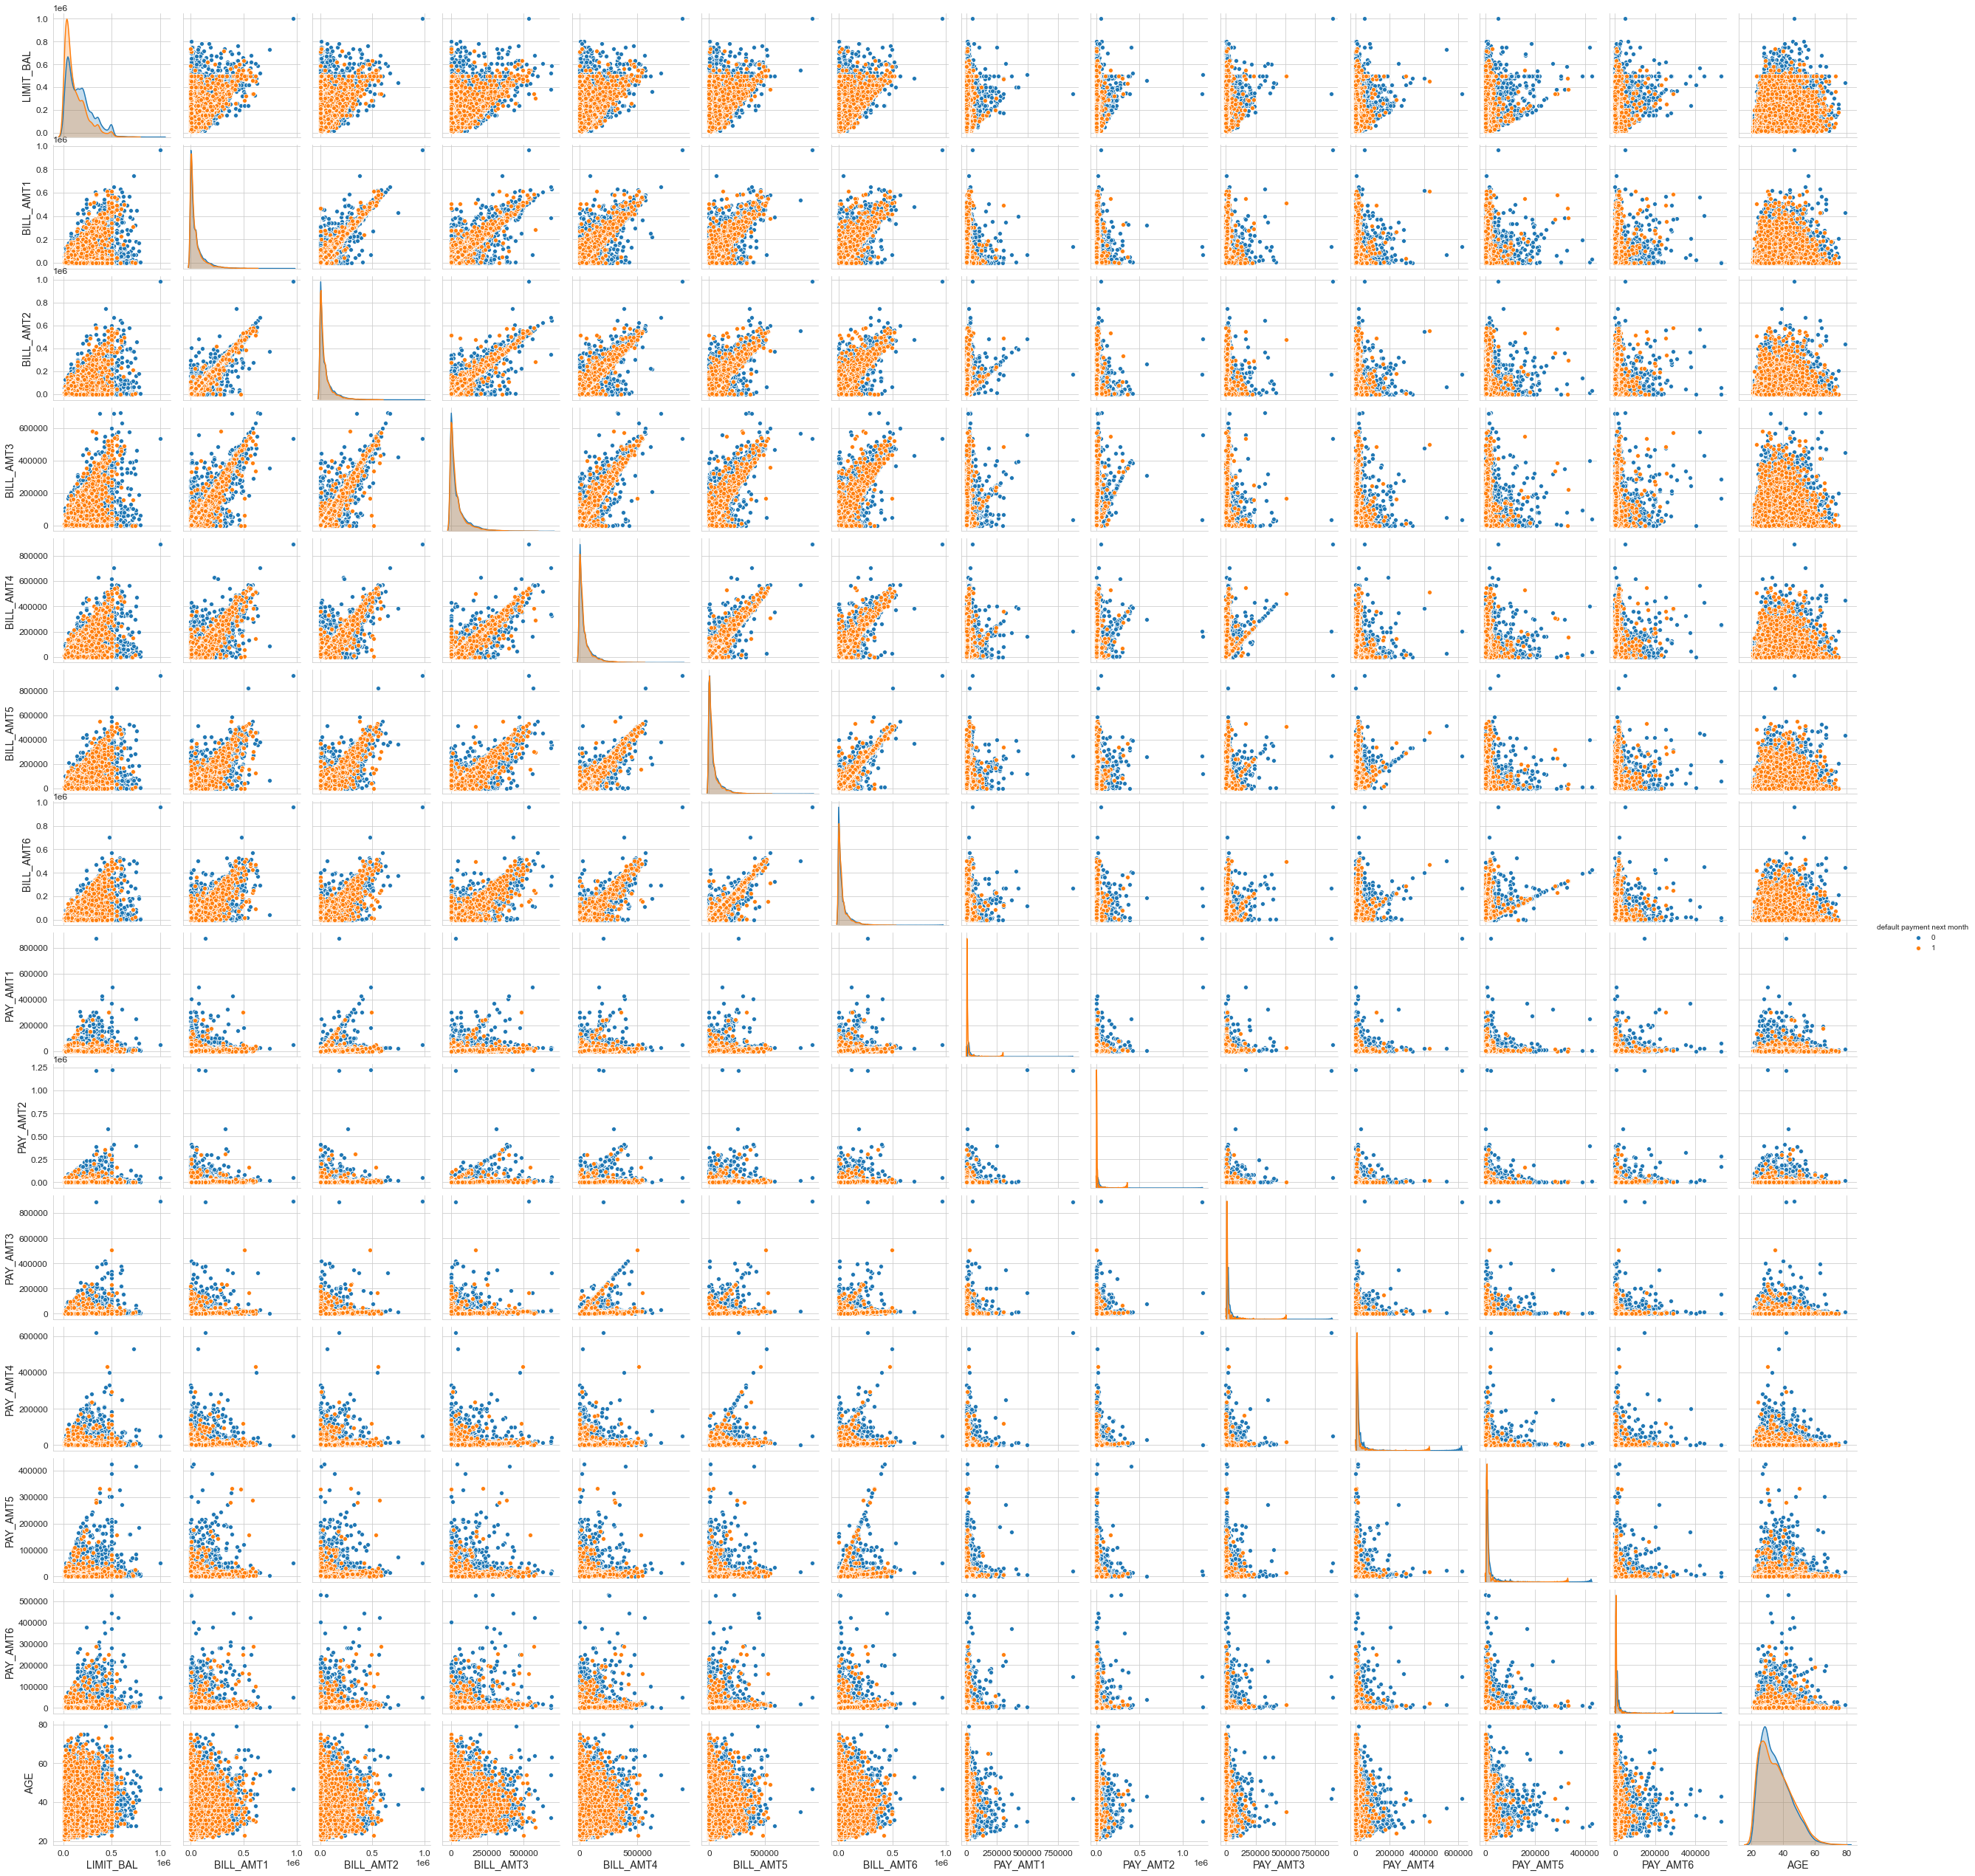

In [19]:
sns.pairplot(data.loc[:,var_num+var_ind],hue="default payment next month")
plt.show()
# In pairplot we are going to verify relation between diffrent values to see if there is any trend or correlation. We can say 

# between BILL_AMT 1-6 and LIMIT_BALL there is somehow correlation. Also there is some weak relation between some of the PAY_AMT values.
# For "AGE"we can not see any relation between AGE and other features.
#In PAY_AMT for hight amount the default payment next month is zero (means people who pay more much in last month are most probably do not have payment next month.)
# For higher Bill_amount the probability of not paying is increased.

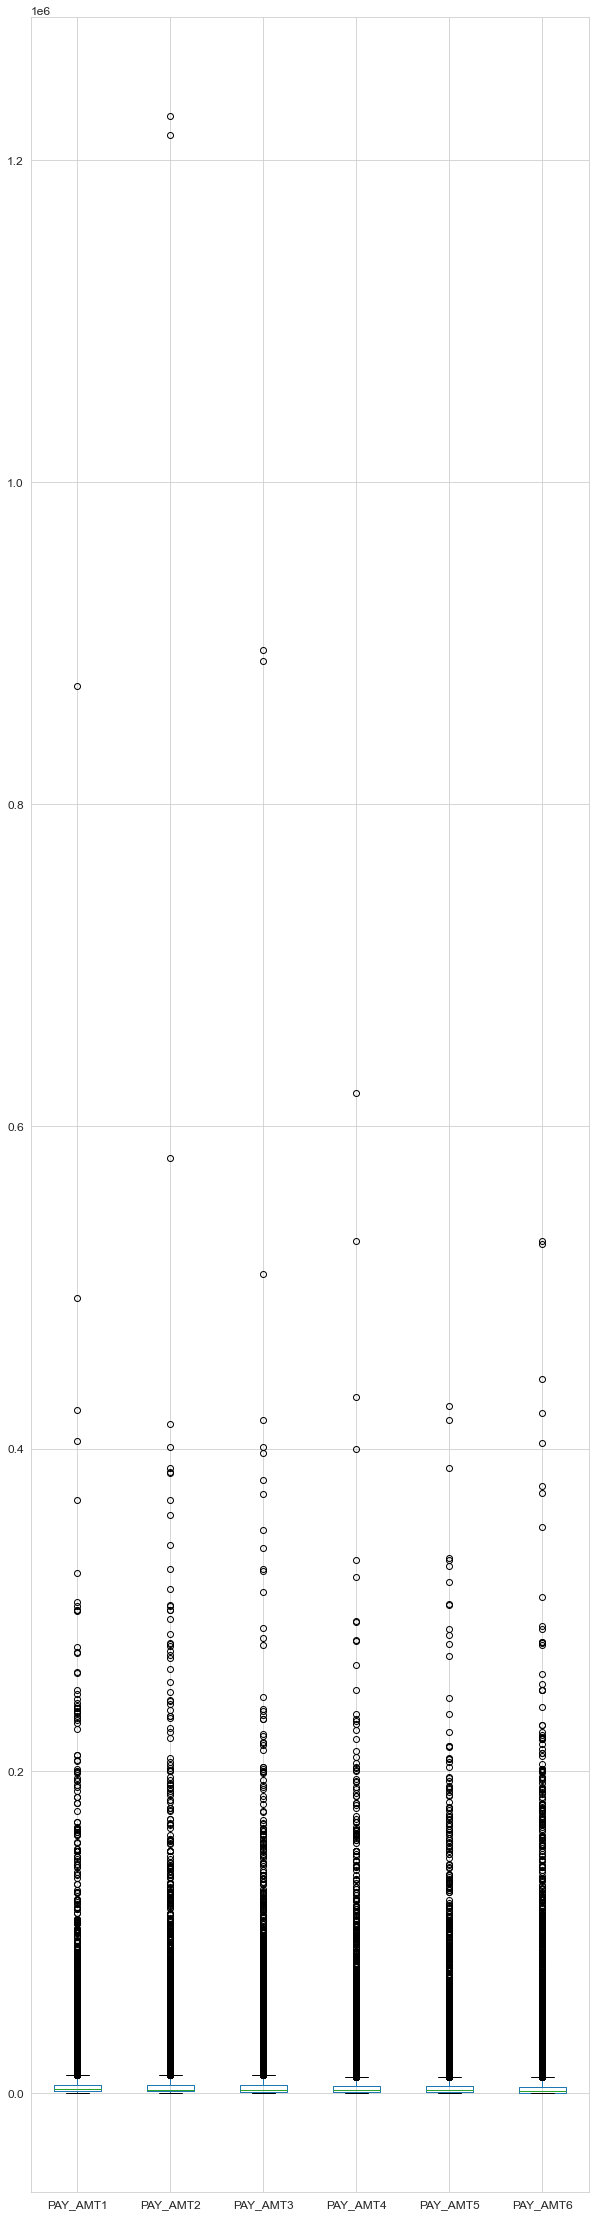

In [20]:
data.boxplot(column=['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],figsize=(10,40))
# The barplot showes the spread of data and the high number of outliers!

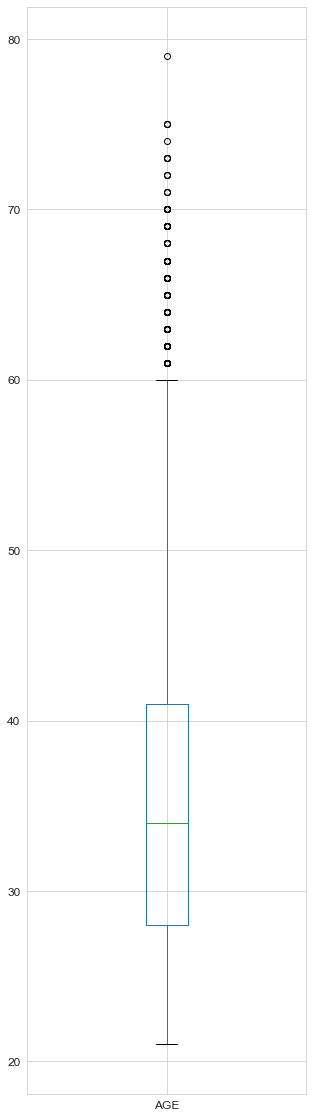

In [21]:
data.boxplot(column=["AGE"],figsize=(5,20))
#Relatively the number of outliers are lower than previous case.

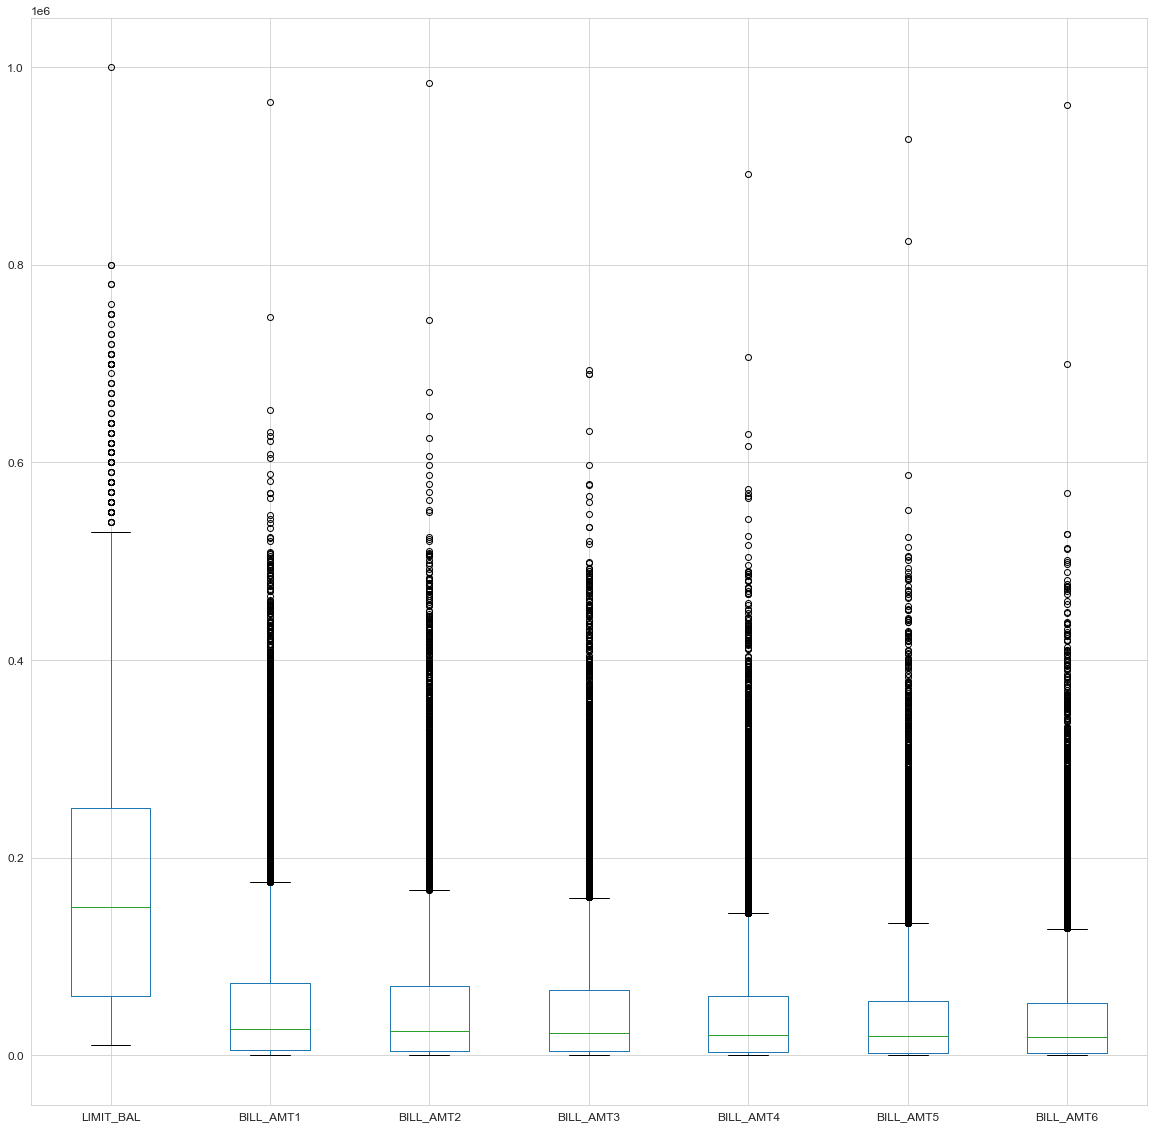

In [22]:
data[data["default payment next month"]==0].boxplot(column=["LIMIT_BAL",'BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', "BILL_AMT6"],figsize=(20,20))
# Again high volume of outliers!

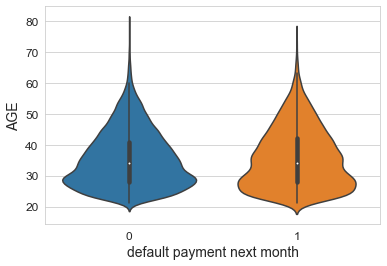

In [23]:
 # In violen plot here,we can see distribution of each numerical data according to class 1,0. 
    # 
    sns.violinplot(x="default payment next month", y="AGE", data=data,fidsize=(20,10))



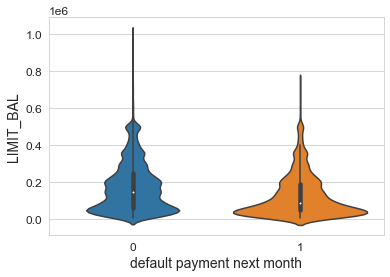

In [24]:
sns.violinplot(x="default payment next month", y="LIMIT_BAL",data=data,fidsize=(20,10))
# People that pay next month , have wider distribution in low valus.
 

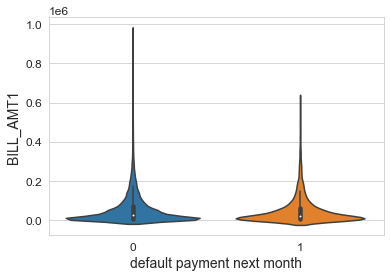

In [25]:
sns.violinplot(x="default payment next month", y="BILL_AMT1",data=data,fidsize=(20,10))


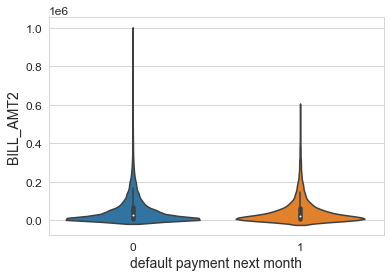

In [26]:
sns.violinplot(x="default payment next month", y="BILL_AMT2",data=data,fidsize=(20,10))

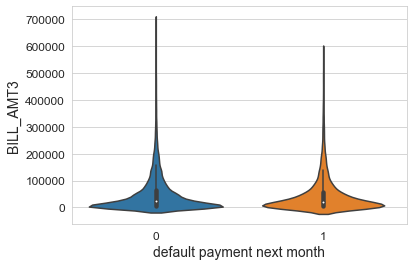

In [27]:
sns.violinplot(x="default payment next month", y="BILL_AMT3",data=data,fidsize=(20,10))

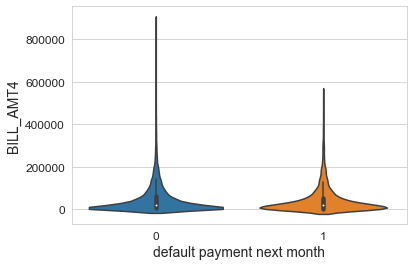

In [28]:
sns.violinplot(x="default payment next month", y="BILL_AMT4",data=data,fidsize=(20,10))

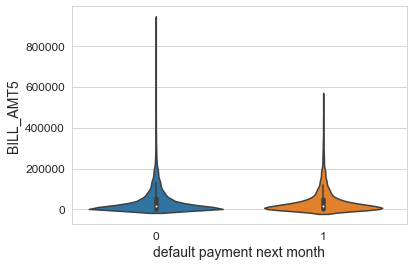

In [29]:
sns.violinplot(x="default payment next month", y="BILL_AMT5",data=data,fidsize=(20,10))

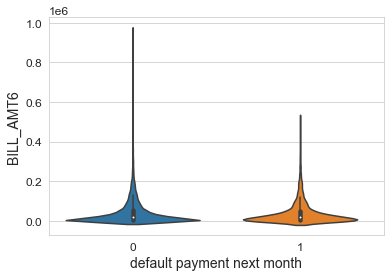

In [30]:
sns.violinplot(x="default payment next month", y="BILL_AMT6",data=data,fidsize=(20,10))

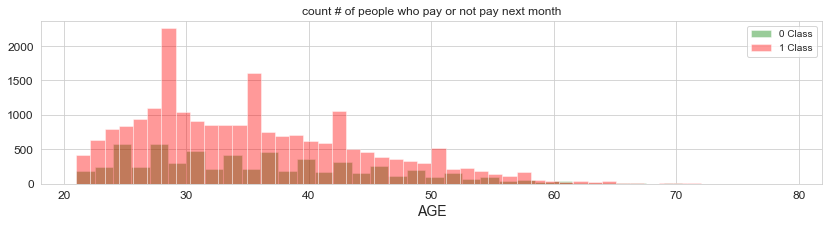

In [284]:
plt.figure(figsize=(14,3))

sns.distplot(data[data["default payment next month"]== 1]['AGE'], color='green', kde=False, label='0 Class')
sns.distplot(data[data["default payment next month"]== 0]['AGE'], color='red', kde=False, label='1 Class')
plt.legend()
plt.title('count # of people who pay or not pay next month')
plt.show()


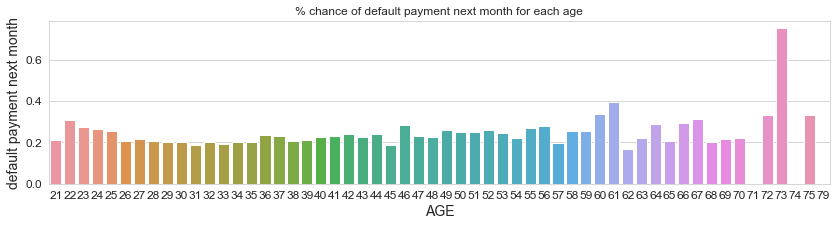

In [285]:
plt.figure(figsize=(14,3))
bp_pivot = data.groupby('AGE')["default payment next month"].mean().reset_index()
sns.barplot(bp_pivot["AGE"], bp_pivot["default payment next month"])
                                      
plt.title('% chance of default payment next month for each age')
plt.show()
# It does not seem there are observable distinguition between different ages.

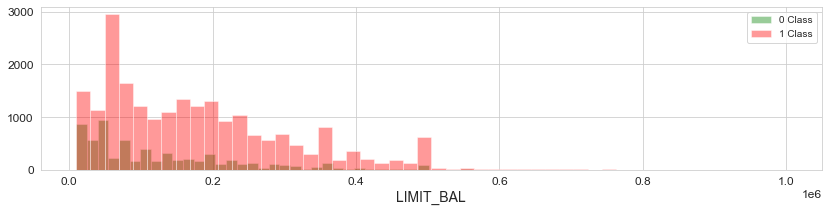

In [33]:
plt.figure(figsize=(14,3))

sns.distplot(data[data["default payment next month"]== 1]['LIMIT_BAL'], color='green', kde=False, label='0 Class')
sns.distplot(data[data["default payment next month"]== 0]['LIMIT_BAL'], color='red', kde=False, label='1 Class')
plt.legend()
plt.show()

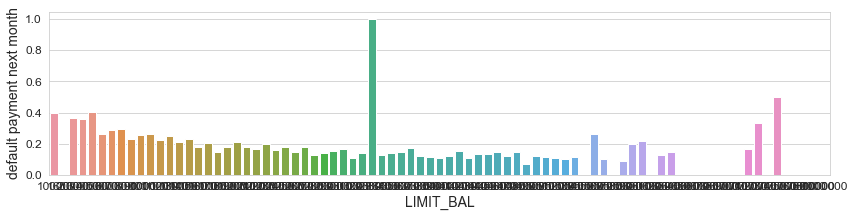

In [34]:
plt.figure(figsize=(14,3))
bp_pivot = data.groupby('LIMIT_BAL')["default payment next month"].mean().reset_index()
sns.barplot(bp_pivot["LIMIT_BAL"], bp_pivot["default payment next month"])
                                      

plt.show()
#for smaller LiMIT_BAL the chance of next month pay increases.

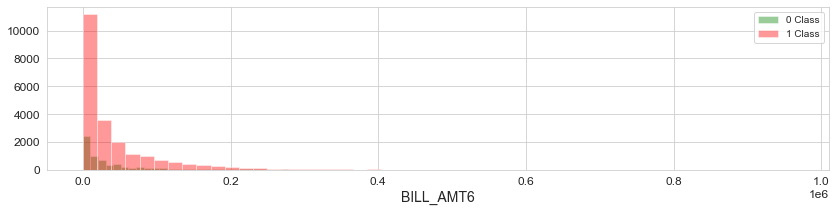

In [35]:
plt.figure(figsize=(14,3))

sns.distplot(data[data["default payment next month"]== 1]['BILL_AMT6'], color='green', kde=False, label='0 Class')
sns.distplot(data[data["default payment next month"]== 0]['BILL_AMT6'], color='red', kde=False, label='1 Class')
plt.legend()
plt.show()

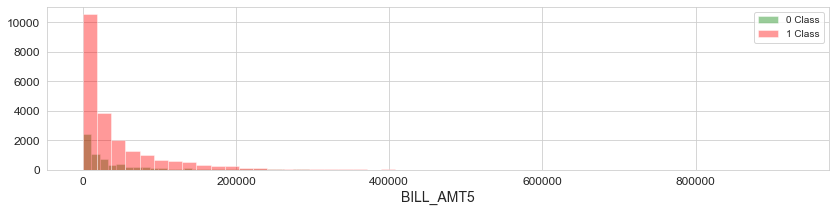

In [37]:
plt.figure(figsize=(14,3))

sns.distplot(data[data["default payment next month"]== 1]['BILL_AMT5'], color='green', kde=False, label='0 Class')
sns.distplot(data[data["default payment next month"]== 0]['BILL_AMT5'], color='red', kde=False, label='1 Class')
plt.legend()
plt.show()

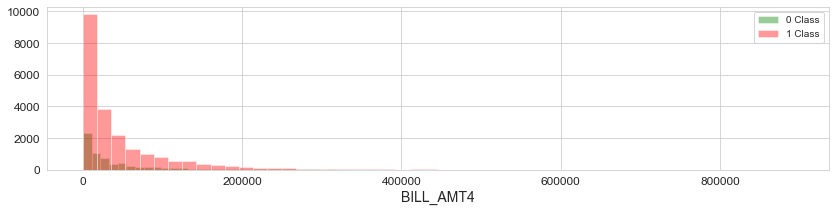

In [38]:
plt.figure(figsize=(14,3))

sns.distplot(data[data["default payment next month"]== 1]['BILL_AMT4'], color='green', kde=False, label='0 Class')
sns.distplot(data[data["default payment next month"]== 0]['BILL_AMT4'], color='red', kde=False, label='1 Class')
plt.legend()
plt.show()

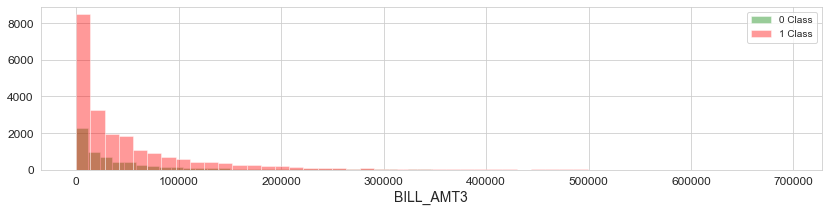

In [39]:
plt.figure(figsize=(14,3))

sns.distplot(data[data["default payment next month"]== 1]['BILL_AMT3'], color='green', kde=False, label='0 Class')
sns.distplot(data[data["default payment next month"]== 0]['BILL_AMT3'], color='red', kde=False, label='1 Class')
plt.legend()
plt.show()

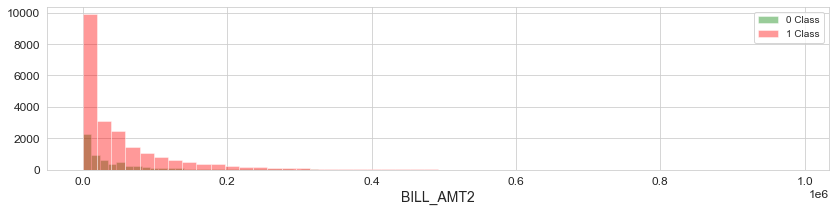

In [40]:
plt.figure(figsize=(14,3))

sns.distplot(data[data["default payment next month"]== 1]['BILL_AMT2'], color='green', kde=False, label='0 Class')
sns.distplot(data[data["default payment next month"]== 0]['BILL_AMT2'], color='red', kde=False, label='1 Class')
plt.legend()
plt.show()

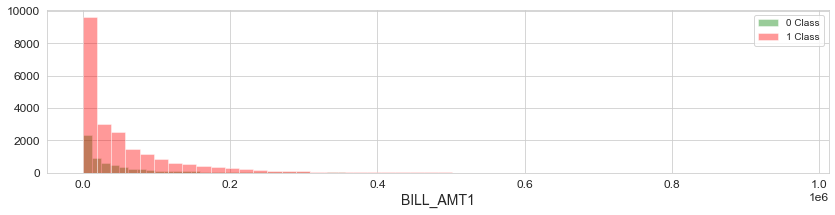

In [41]:
plt.figure(figsize=(14,3))

sns.distplot(data[data["default payment next month"]== 1]['BILL_AMT1'], color='green', kde=False, label='0 Class')
sns.distplot(data[data["default payment next month"]== 0]['BILL_AMT1'], color='red', kde=False, label='1 Class')
plt.legend()
plt.show()
# For all BILL_AMT in smaller values ,more population pay next month.

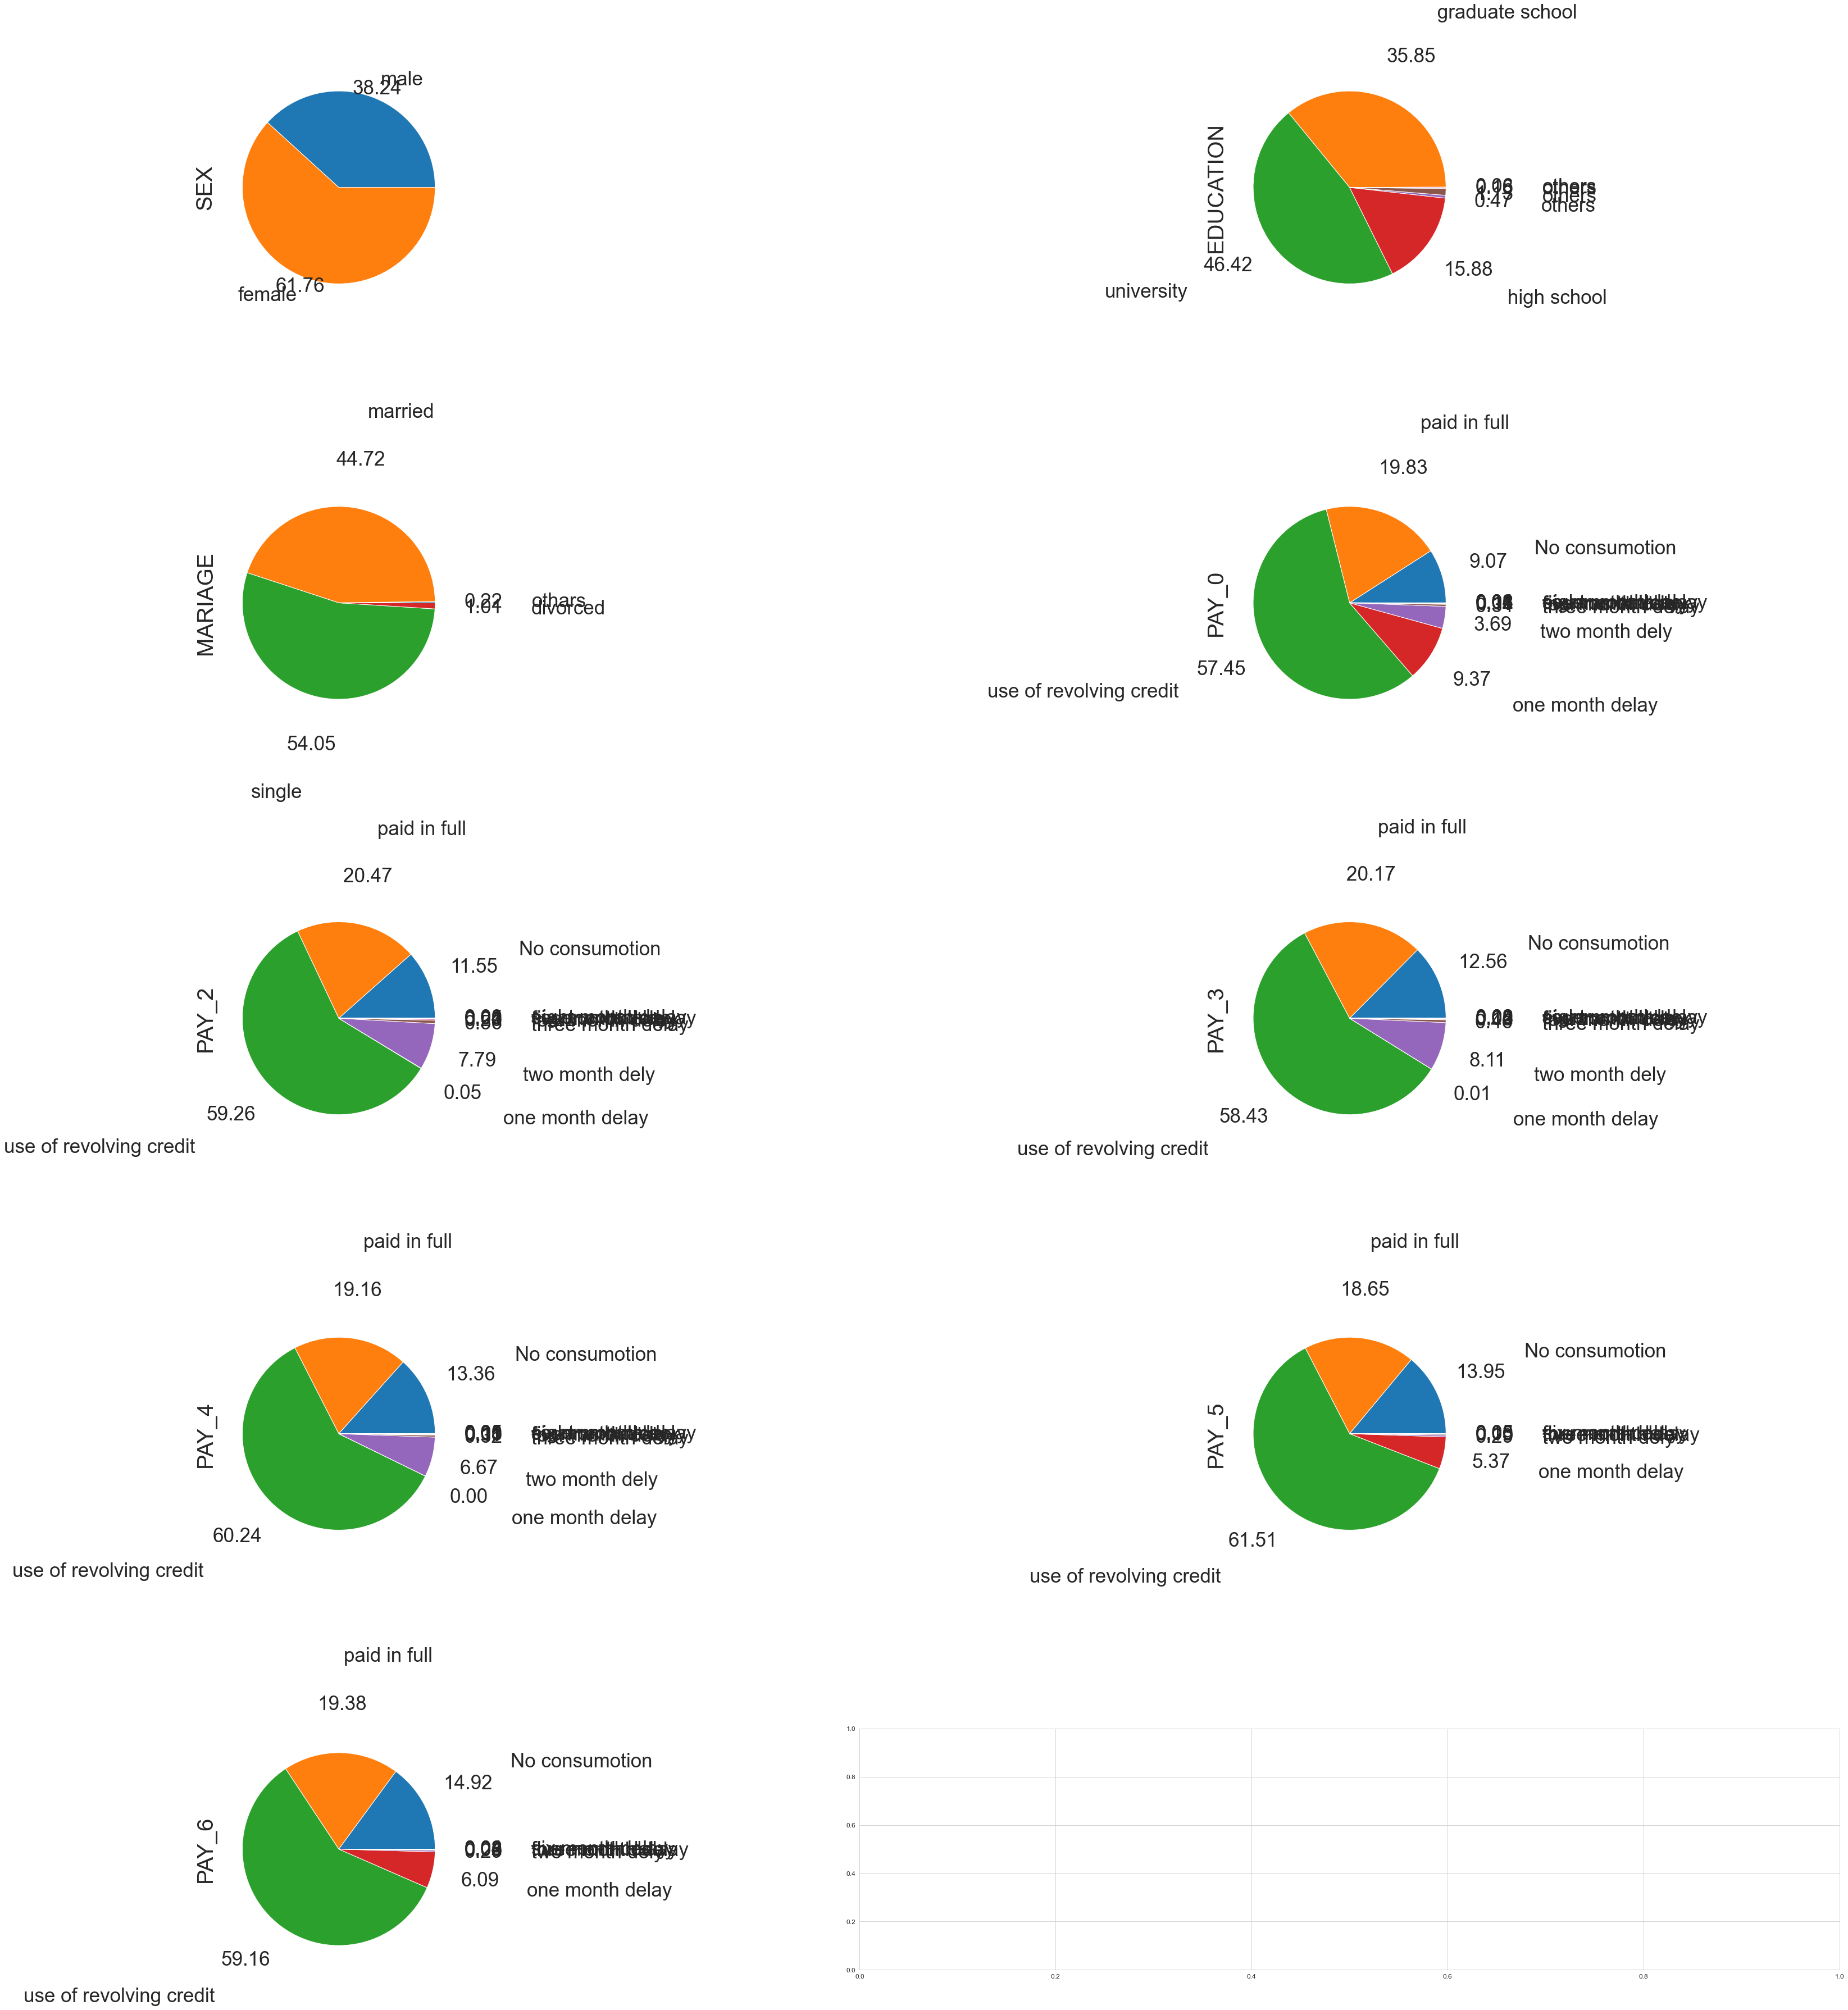

In [286]:
fig, axes = plt.subplots(nrows=5,ncols=2,figsize=(50,50))

data[data["default payment next month"]==0].groupby('SEX').size().plot(kind='pie', textprops={'fontsize': 35},ax=axes[0,0],autopct='%.2f',labels=["male","female"],pctdistance=1.1, labeldistance=1.2)
                               
data[data["default payment next month"]==0].groupby('EDUCATION').size().plot(kind='pie', textprops={'fontsize':35},autopct="%.2f",labels=["others"," graduate school", "university", "high school", "others", "others","others"], ax=axes[0,1],pctdistance=1.5, labeldistance=2,radius=1)

data[data["default payment next month"]==0].groupby('MARRIAGE').size().plot(kind='pie', textprops={'fontsize': 35},ax=axes[1,0],autopct='%.2f',labels=["othars","married","single","divorced"],pctdistance=1.5, labeldistance=2)                               

data[data["default payment next month"]==0].groupby("PAY_0").size().plot(kind='pie', textprops={'fontsize': 35},ax=axes[1,1],autopct='%.2f',labels=["No consumotion","paid in full","use of revolving credit","one month delay","two month dely","three month delay","four month delay","five month delay","six month delay","seven month delay","eight month delay"],pctdistance=1.5, labeldistance=2)                               

data[data["default payment next month"]==0].groupby("PAY_2").size().plot(kind='pie', textprops={'fontsize': 35},ax=axes[2,0],autopct='%.2f',labels=["No consumotion","paid in full","use of revolving credit","one month delay","two month dely","three month delay","four month delay","five month delay","six month delay","seven month delay","eight month delay"],pctdistance=1.5, labeldistance=2)                               

data[data["default payment next month"]==0].groupby("PAY_3").size().plot(kind='pie', textprops={'fontsize': 35},ax=axes[2,1],autopct='%.2f',labels=["No consumotion","paid in full","use of revolving credit","one month delay","two month dely","three month delay","four month delay","five month delay","six month delay","seven month delay","eight month delay"],pctdistance=1.5, labeldistance=2)                               

data[data["default payment next month"]==0].groupby("PAY_4").size().plot(kind='pie', textprops={'fontsize': 35},ax=axes[3,0],autopct='%.2f',labels=["No consumotion","paid in full","use of revolving credit","one month delay","two month dely","three month delay","four month delay","five month delay","six month delay","seven month delay","eight month delay"],pctdistance=1.5, labeldistance=2)                               

data[data["default payment next month"]==0].groupby("PAY_5").size().plot(kind='pie', textprops={'fontsize': 35},ax=axes[3,1],autopct='%.2f',labels=["No consumotion","paid in full","use of revolving credit","one month delay","two month dely","three month delay","four month delay","five month delay","six month delay","seven month delay","eight month delay"],pctdistance=1.5, labeldistance=2)                               

data[data["default payment next month"]==0].groupby("PAY_6").size().plot(kind='pie', textprops={'fontsize': 35},ax=axes[4,0],autopct='%.2f',labels=["No consumotion","paid in full","use of revolving credit","one month delay","two month dely","three month delay","four month delay","five month delay","six month delay","seven month delay","eight month delay"],pctdistance=1.5, labeldistance=2)                               



axes[0,0].set_ylabel('SEX', size=40)
axes[0,1].set_ylabel('EDUCATION', size=40)
axes[1,0].set_ylabel('MARIAGE', size=40)
axes[1,1].set_ylabel('PAY_0', size=40)
axes[2,0].set_ylabel('PAY_2', size=40)
axes[2,1].set_ylabel('PAY_3', size=40)
axes[3,0].set_ylabel("PAY_4", size=40)
axes[3,1].set_ylabel('PAY_5', size=40)
axes[4,0].set_ylabel('PAY_6', size=40)
plt.tight_layout()
plt.show()
# The pie_plot is for verifing the categorical feature and their proportion that shows the affect of every component of each category in each class(0,1)

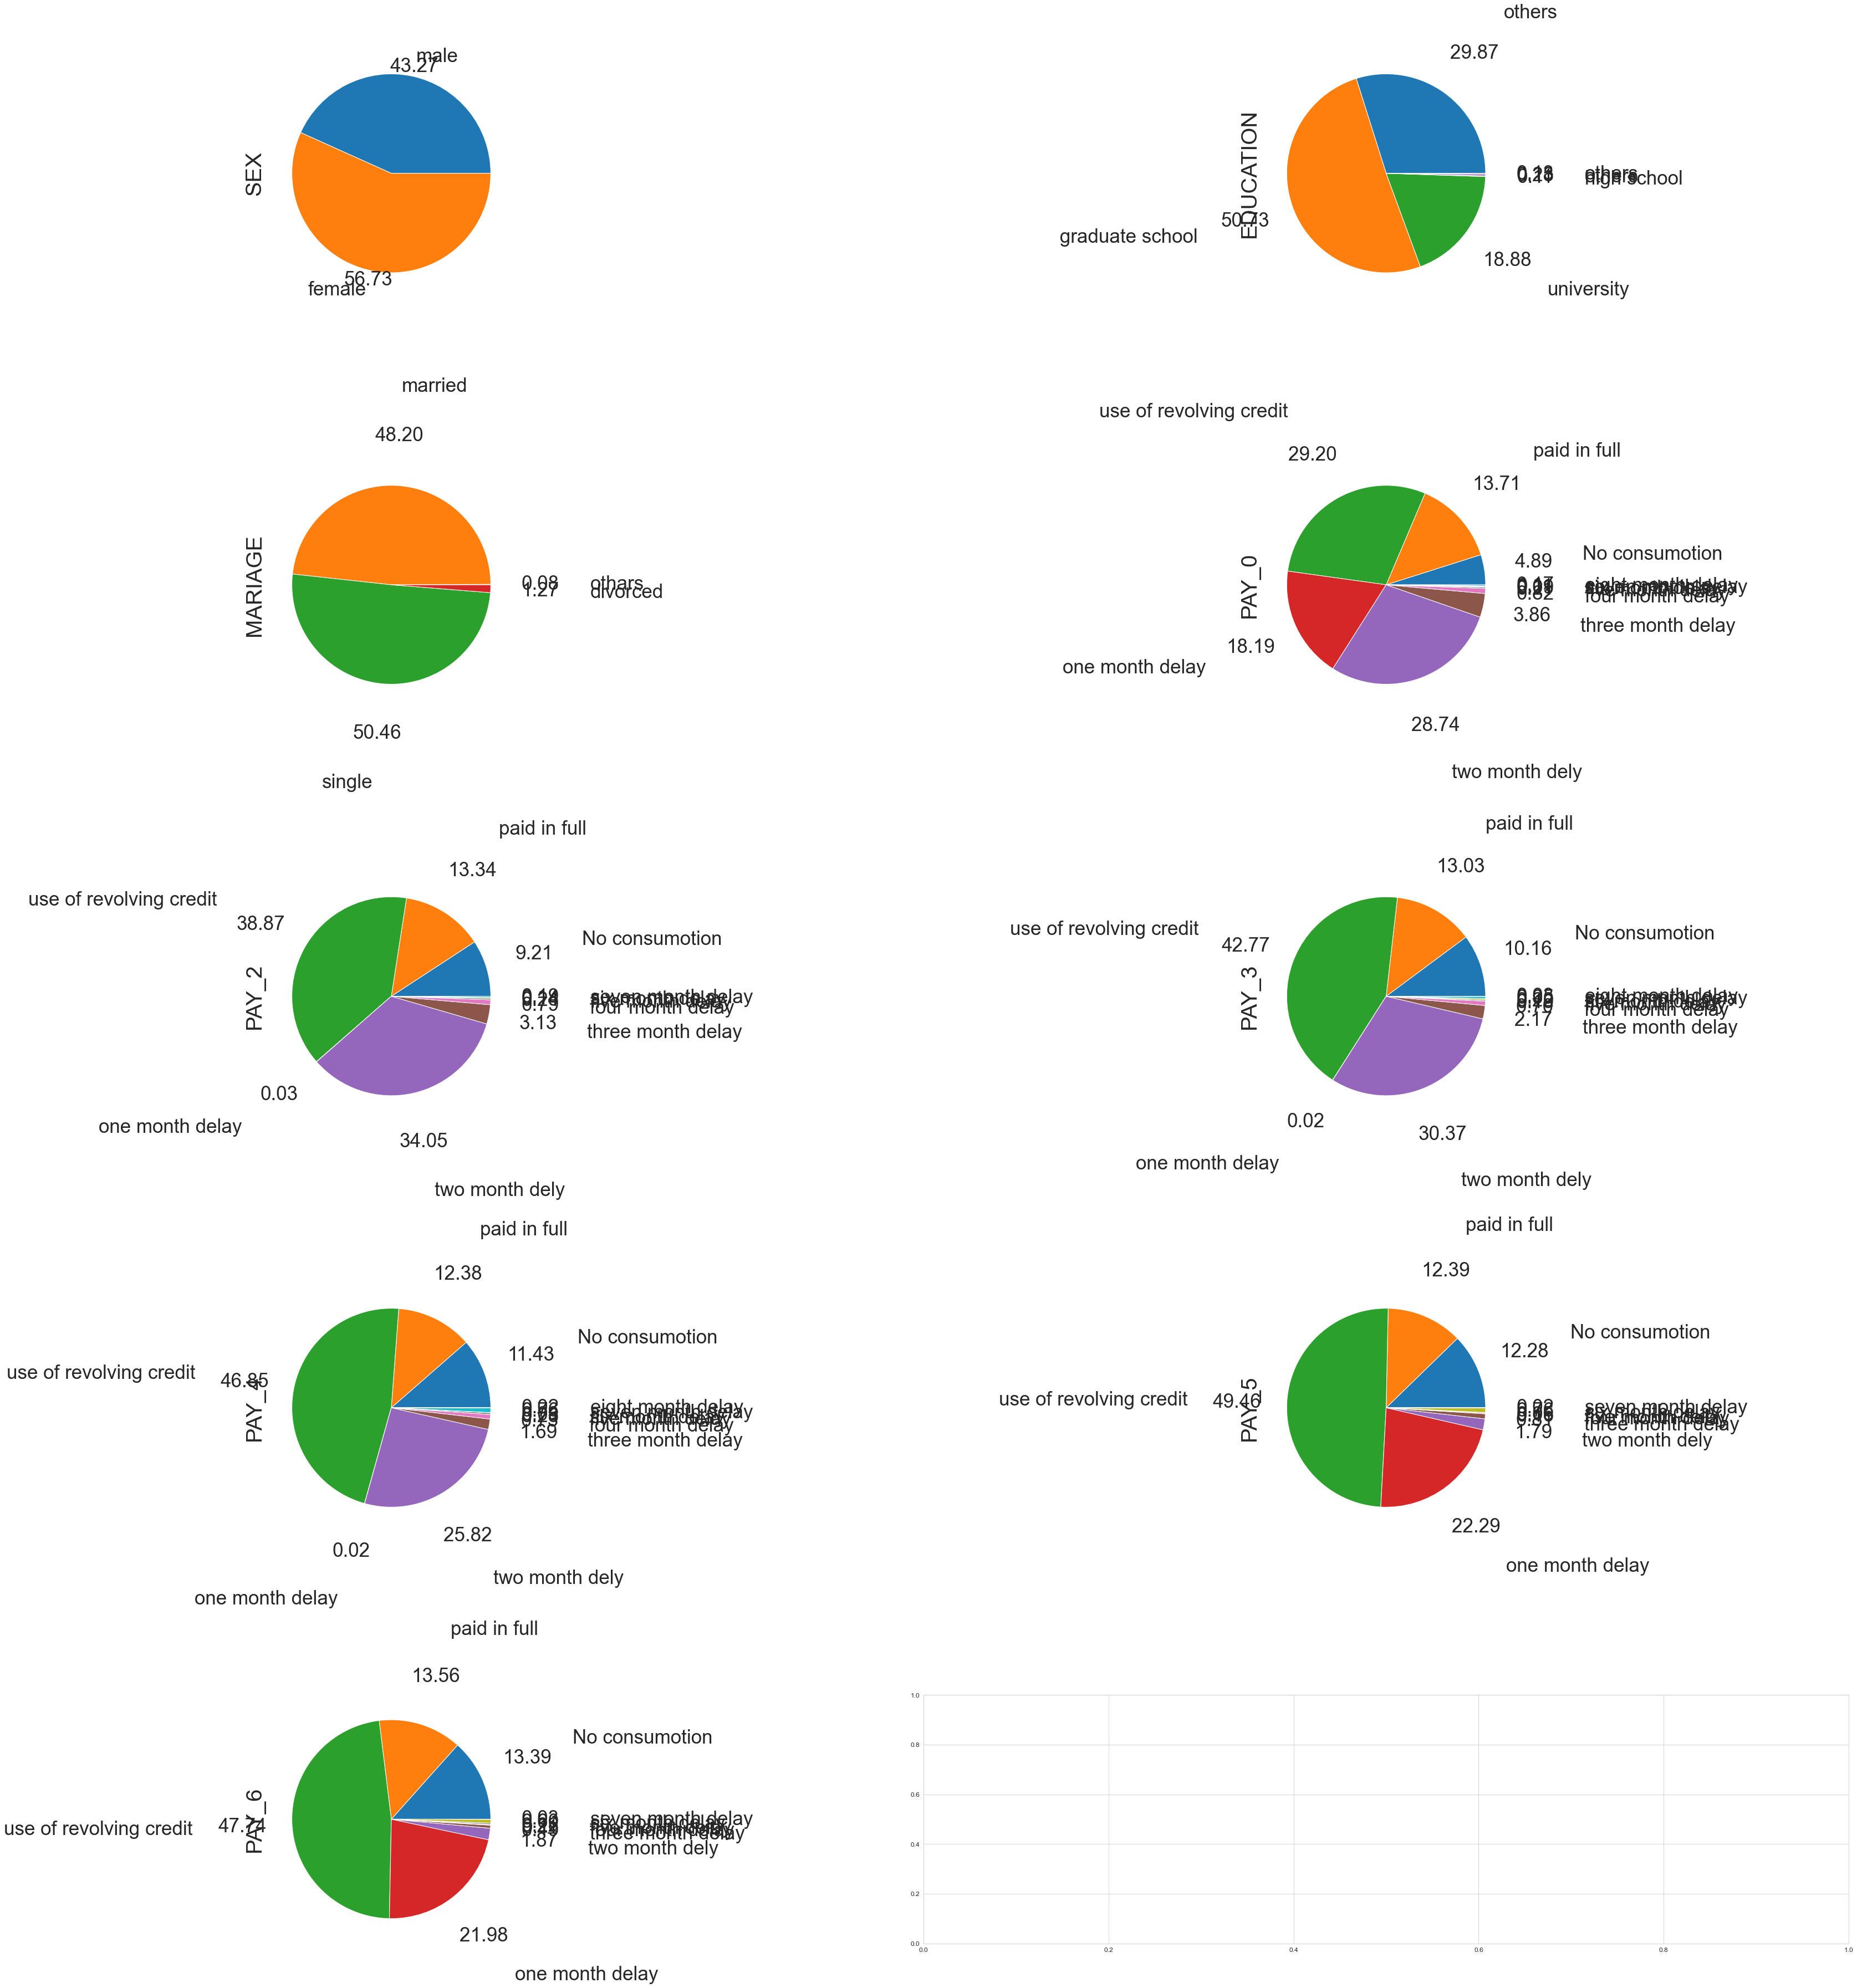

In [43]:
fig, axes = plt.subplots(nrows=5,ncols=2,figsize=(50,50))

data[data["default payment next month"]==1].groupby('SEX').size().plot(kind='pie', textprops={'fontsize': 35},ax=axes[0,0],autopct='%.2f',labels=["male","female"],pctdistance=1.1, labeldistance=1.2)
                               
data[data["default payment next month"]==1].groupby('EDUCATION').size().plot(kind='pie', textprops={'fontsize':35},autopct="%.2f",labels=["others"," graduate school", "university", "high school", "others", "others","others"], ax=axes[0,1],pctdistance=1.5, labeldistance=2,radius=1)

data[data["default payment next month"]==1].groupby('MARRIAGE').size().plot(kind='pie', textprops={'fontsize': 35},ax=axes[1,0],autopct='%.2f',labels=["othars","married","single","divorced"],pctdistance=1.5, labeldistance=2)                               

data[data["default payment next month"]==1].groupby("PAY_0").size().plot(kind='pie', textprops={'fontsize': 35},ax=axes[1,1],autopct='%.2f',labels=["No consumotion","paid in full","use of revolving credit","one month delay","two month dely","three month delay","four month delay","five month delay","six month delay","seven month delay","eight month delay"],pctdistance=1.5, labeldistance=2)                               

data[data["default payment next month"]==1].groupby("PAY_2").size().plot(kind='pie', textprops={'fontsize': 35},ax=axes[2,0],autopct='%.2f',labels=["No consumotion","paid in full","use of revolving credit","one month delay","two month dely","three month delay","four month delay","five month delay","six month delay","seven month delay","eight month delay"],pctdistance=1.5, labeldistance=2)                               

data[data["default payment next month"]==1].groupby("PAY_3").size().plot(kind='pie', textprops={'fontsize': 35},ax=axes[2,1],autopct='%.2f',labels=["No consumotion","paid in full","use of revolving credit","one month delay","two month dely","three month delay","four month delay","five month delay","six month delay","seven month delay","eight month delay"],pctdistance=1.5, labeldistance=2)                               

data[data["default payment next month"]==1].groupby("PAY_4").size().plot(kind='pie', textprops={'fontsize': 35},ax=axes[3,0],autopct='%.2f',labels=["No consumotion","paid in full","use of revolving credit","one month delay","two month dely","three month delay","four month delay","five month delay","six month delay","seven month delay","eight month delay"],pctdistance=1.5, labeldistance=2)                               

data[data["default payment next month"]==1].groupby("PAY_5").size().plot(kind='pie', textprops={'fontsize': 35},ax=axes[3,1],autopct='%.2f',labels=["No consumotion","paid in full","use of revolving credit","one month delay","two month dely","three month delay","four month delay","five month delay","six month delay","seven month delay","eight month delay"],pctdistance=1.5, labeldistance=2)                               

data[data["default payment next month"]==1].groupby("PAY_6").size().plot(kind='pie', textprops={'fontsize': 35},ax=axes[4,0],autopct='%.2f',labels=["No consumotion","paid in full","use of revolving credit","one month delay","two month dely","three month delay","four month delay","five month delay","six month delay","seven month delay","eight month delay"],pctdistance=1.5, labeldistance=2)                               



axes[0,0].set_ylabel('SEX', size=40)
axes[0,1].set_ylabel('EDUCATION', size=40)
axes[1,0].set_ylabel('MARIAGE', size=40)
axes[1,1].set_ylabel('PAY_0', size=40)
axes[2,0].set_ylabel('PAY_2', size=40)
axes[2,1].set_ylabel('PAY_3', size=40)
axes[3,0].set_ylabel("PAY_4", size=40)
axes[3,1].set_ylabel('PAY_5', size=40)
axes[4,0].set_ylabel('PAY_6', size=40)
plt.tight_layout()
plt.show()

In [287]:
import scipy
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [288]:
var_cat=["SEX","EDUCATION","MARRIAGE","PAY_0","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6"]
var_num=["LIMIT_BAL_log",'BILL_AMT1', 'BILL_AMT2','BILL_AMT3_log', 'BILL_AMT4_log', 'BILL_AMT5_log', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',"AGE_log"]
var_ind= ['default payment next month']

# Data Preprocessing

In [289]:

#Data Preprocessing:


# Categorical -  one hot encode

cat_ohe_step = ('ohe', OneHotEncoder(sparse=False, handle_unknown='ignore'))
cat_steps = [cat_ohe_step]
cat_pipe = Pipeline(cat_steps)
cat_transformers = [('cat', cat_pipe, var_cat)]

In [290]:
# Numerical -  scale

num_scl_step = ('scl', MinMaxScaler())
num_steps = [ num_scl_step]
num_pipe = Pipeline(num_steps)
num_transformers = [('num', num_pipe, var_num)]

In [292]:
# Pipeline

ct = ColumnTransformer(transformers=cat_transformers + num_transformers)
ct.fit(data[var_cat+var_num])
X = ct.transform(data[var_cat+var_num])
y=data[["default payment next month"]].values


In [293]:
# Splitting data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(22456, 91) (5614, 91) (22456, 1) (5614, 1)


In [317]:
# CV before hyperparameter

from sklearn.model_selection import cross_val_score
enr= RandomForestClassifier()
scores = cross_val_score(enr, X_train, np.ravel(y_train), cv=5,scoring='roc_auc')
print(scores)

print( ' mean accuracy: ', round(scores.mean(),4), '% std: ', round(scores.var(), 4),'%')

[0.76057759 0.76371119 0.76600858 0.77793767 0.7775878 ]
 mean accuracy:  0.7692 % std:  0.0001 %


In [318]:
# CV before hyperparameter
enr= KNeighborsClassifier()
scores = cross_val_score(enr, X_train, np.ravel(y_train), cv=5,scoring='roc_auc')
print(scores)
print( ' mean accuracy: ', round(scores.mean(),4), '% std: ', round(scores.var(),4),'%')

# CV before hyperparameter shows RandomForest has better proficiency

[0.70351618 0.71258255 0.69643778 0.71446074 0.71933906]
 mean accuracy:  0.7093 % std:  0.0001 %


# Improving Models 

In [314]:

#Hyperparameter (RF)

from sklearn.model_selection import GridSearchCV
param_grid ={"n_estimators":[4,5,10,20,50 ]}
clf=RandomForestClassifier()

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid,scoring='roc_auc',cv=5)
                           
                           
grid_search.fit(X=X, y=np.ravel(y)) 
print(grid_search.best_params_)
print("\n",grid_search.best_estimator_)

{'n_estimators': 50}

 RandomForestClassifier(n_estimators=50)


In [319]:
# CV after tunning parameters

enr= RandomForestClassifier(n_estimators=50)
scores = cross_val_score(enr, X_train, np.ravel(y_train), cv=5,scoring='roc_auc')
print(scores)

print( ' mean accuracy: ', round(scores.mean(),4), '% std: ', round(scores.var(),4),'%')

[0.75465453 0.76585722 0.75689783 0.77509523 0.77599459]
 mean accuracy:  0.7657 % std:  0.0001 %


In [315]:
# Hyperparameter(KNN)

param_grid ={"n_neighbors":[3, 5, 10, 20 ]}
clf=KNeighborsClassifier()

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid,scoring='roc_auc',cv=5)
                           
                           
grid_search.fit(X=X, y=np.ravel(y))  
print(grid_search.best_params_)
print("\n",grid_search.best_estimator_)

{'n_neighbors': 20}

 KNeighborsClassifier(n_neighbors=20)


In [320]:
# Cv after hyperparameter

enr= KNeighborsClassifier(n_neighbors=20)
scores = cross_val_score(enr, X_train, np.ravel(y_train), cv=5,scoring='roc_auc')
print(scores)
print( ' mean accuracy: ', round(scores.mean(),4), '% std: ', round(scores.var(),4),'%')

# CV after hyperparameter shows ,however CV_score for KNN model increased after cross validation (from mean 70.93 to 75.29),but still Random forest model has more score (76.58)


[0.74383568 0.74953106 0.74539786 0.75946263 0.76619144]
 mean accuracy:  0.7529 % std:  0.0001 %


In [356]:
# Fitting the models

model_rf=RandomForestClassifier(n_estimators=50).fit(X_train, np.ravel(y_train))
model_knn=KNeighborsClassifier(n_neighbors=20).fit(X_train, np.ravel(y_train))

# Scoring

In [357]:
# Scoring

from sklearn.metrics import roc_auc_score
y_rf_pr = model_rf.predict_proba(X_test)
print("Accuracy of RandomForestClassifier is: ",roc_auc_score(y_test,y_rf_pr[:,1]))



Accuracy of RandomForestClassifier is:  0.7592804943823289


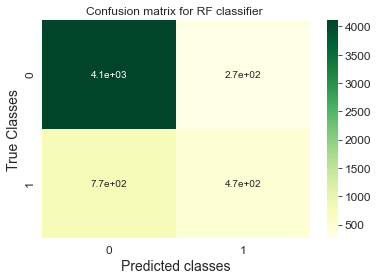

In [370]:
# Confution matrix
y_rf_pr1 = model_rf.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix
plt.title('Confusion matrix for RF classifier ')

sns.heatmap(confusion_matrix(y_test, y_rf_pr1), annot=True, cmap="YlGn")
plt.xlabel('Predicted classes')
plt.ylabel('True Classes')
plt.show()


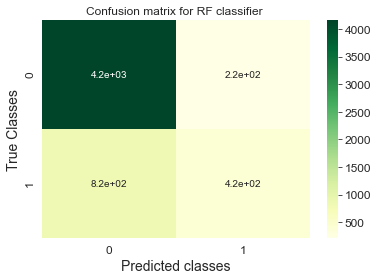

In [371]:
# Confusion matrix(KNN)

y_knn_pr1 = model_knn.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix
plt.title('Confusion matrix for RF classifier ')

sns.heatmap(confusion_matrix(y_test, y_knn_pr1), annot=True, cmap="YlGn")
plt.xlabel('Predicted classes')
plt.ylabel('True Classes')
plt.show()

In [304]:
# Scoring
y_knn_pr = model_knn.predict_proba(X_test)

print("Accuracy of KNeighborsClassifier is: ",roc_auc_score(y_test,y_knn_pr[:,1]))
 # After fitting the model KNN model sounds better model


Accuracy of KNeighborsClassifier is:  0.7614086918610704


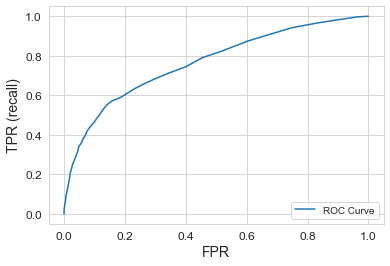

In [321]:
#ROC

from sklearn.metrics import roc_curve
model_rf=RandomForestClassifier(n_estimators=50).fit(X_train, np.ravel(y_train))
fpr, tpr, thresholds = roc_curve(np.ravel(y_test), model_rf.predict_proba(X_test)[:,1])

plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")

plt.legend(loc=4)

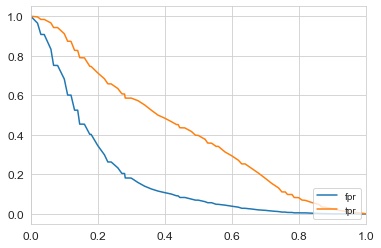

In [322]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(thresholds,fpr, color='tab:blue',label="fpr")
ax.plot(thresholds,tpr, color='tab:orange',label="tpr")
ax.set_xlim([0,1])
plt.legend(loc=4);

In [348]:
# Selecting optimized thresholds:
#As we know the most important factor in selecting a customed thresholds is to think about the cost of FPR(false positive rate) and FNR(false negative rate).
#Having background or being familiar with a business should be very helpfull.Making decition about wether increasing FP or NP has positive or negative effect on our busuness is not simple,
#In our business(credit card) as all the decitions are made based on  the amount of client's payment,I think if we have more false positive ,we will face some problem.
#Imagine we count on paying some people who are not actually paying, so I try to get lower FP in moving the threshold.I chose threshold 0.6 to lower FP and not missing TP a lot.
print(y_rf_pr)

y_rf_pr2=[1 if x >= 0.6 else 0 for x in y_rf_pr[:,1]]

from sklearn.metrics import f1_score
f1_score(y_test,y_rf_pr2)

[[0.88 0.12]
 [0.7  0.3 ]
 [0.76 0.24]
 ...
 [0.9  0.1 ]
 [1.   0.  ]
 [0.58 0.42]]


0.40359752670039345

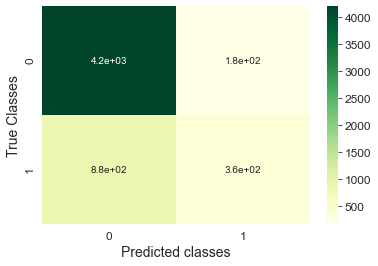

In [372]:
# confusion mitrix after changing threshold
sns.heatmap(confusion_matrix(y_test, y_rf_pr2), annot=True, cmap="YlGn")
plt.xlabel('Predicted classes')
plt.ylabel('True Classes')
plt.show()


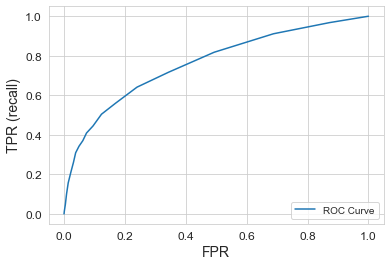

In [340]:
model_rf=KNeighborsClassifier(n_neighbors=20).fit(X_train, np.ravel(y_train))
fpr, tpr, thresholds = roc_curve(np.ravel(y_test), model_rf.predict_proba(X_test)[:,1])

plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")

plt.legend(loc=4)


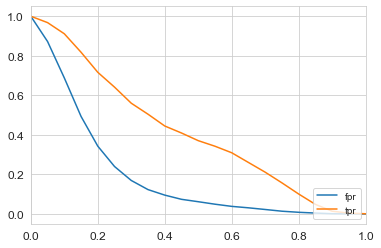

In [341]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(thresholds,fpr, color='tab:blue',label="fpr")
ax.plot(thresholds,tpr, color='tab:orange',label="tpr")
ax.set_xlim([0,1])
plt.legend(loc=4);


In [253]:
clf=KNeighborsClassifier(n_neighbors=20)
clf.fit(X_train,y_train)
y_pred=clf.predict_proba(X_test)

<ipython-input-253-73abe462d57a>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  clf.fit(X_train,y_train)


In [347]:
y_knn_pr2=[1 if x >= 0.6 else 0 for x in y_rf_pr[:,1]]

from sklearn.metrics import f1_score
f1_score(y_test,y_knn_pr2)

0.40359752670039345

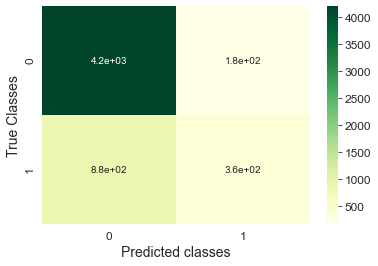

In [373]:
sns.heatmap(confusion_matrix(y_test, y_knn_pr2), annot=True, cmap="YlGn")
plt.xlabel('Predicted classes')
plt.ylabel('True Classes')
plt.show()


In [ ]:
# Looking at confusionMatrix before and after tunning Threshold,showsthe number of FP in both modelhas decreased.